In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('twitter_human_bots_dataset.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  object 
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30181 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37434 non-null  object 
 12  profile_background_image_url  32939 non-null  object 
 13  p

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


## 1. Basic Dataset Overview


In [4]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Missing Data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Values per Column:
Unnamed: 0                         0
created_at                         0
default_profile                    0
default_profile_image              0
description                     7257
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           4
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64

Total Missing Values: 19718
Percentage of Missing Data: 2.63%


## 1.1 Data Cleaning
1. Drop duplicates
2. fill missing values with majority

In [5]:
# Data Cleaning Steps
df = df.drop_duplicates()
missing_cols = df.columns[df.isnull().any()]
for col in missing_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [6]:

df.describe()

,Unnamed: 0,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,18718.500000,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052
std,10807.564026,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,9359.250000,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,18718.500000,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,28077.750000,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,37437.000000,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000


## 1.2 Split between account types

C:\Users\admin\AppData\Local\Temp\ipykernel_26152\3682779477.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_counts.index, y=account_counts.values, palette='viridis')


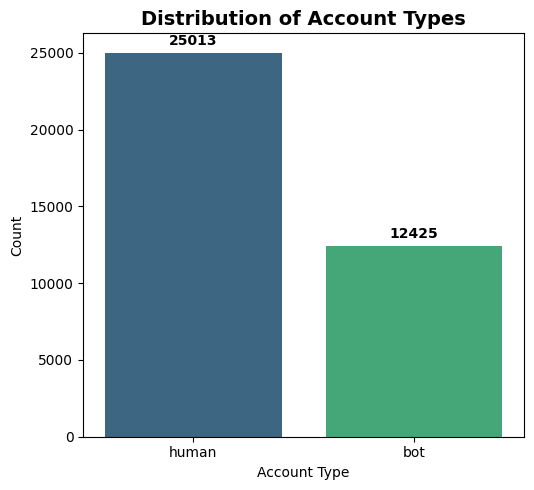


Account Type Distribution:
account_type
human    25013
bot      12425
Name: count, dtype: int64

Class Balance Ratio: 2.01:1


In [28]:
# Distribution of account types (bot vs human)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Count plot
plt.subplot(1, 2, 1)
account_counts = df['account_type'].value_counts()
sns.barplot(x=account_counts.index, y=account_counts.values, palette='viridis')
plt.title('Distribution of Account Types', fontsize=14, fontweight='bold')
plt.xlabel('Account Type')
plt.ylabel('Count')
for i, v in enumerate(account_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()

print(f"\nAccount Type Distribution:")
print(account_counts)
print(f"\nClass Balance Ratio: {account_counts.values[0]/account_counts.values[1]:.2f}:1")

## 1.2 Hypothesis Testing

Boolean features about account characteristics analysis

i.e. Bot vs Human accounts percentage having certain features

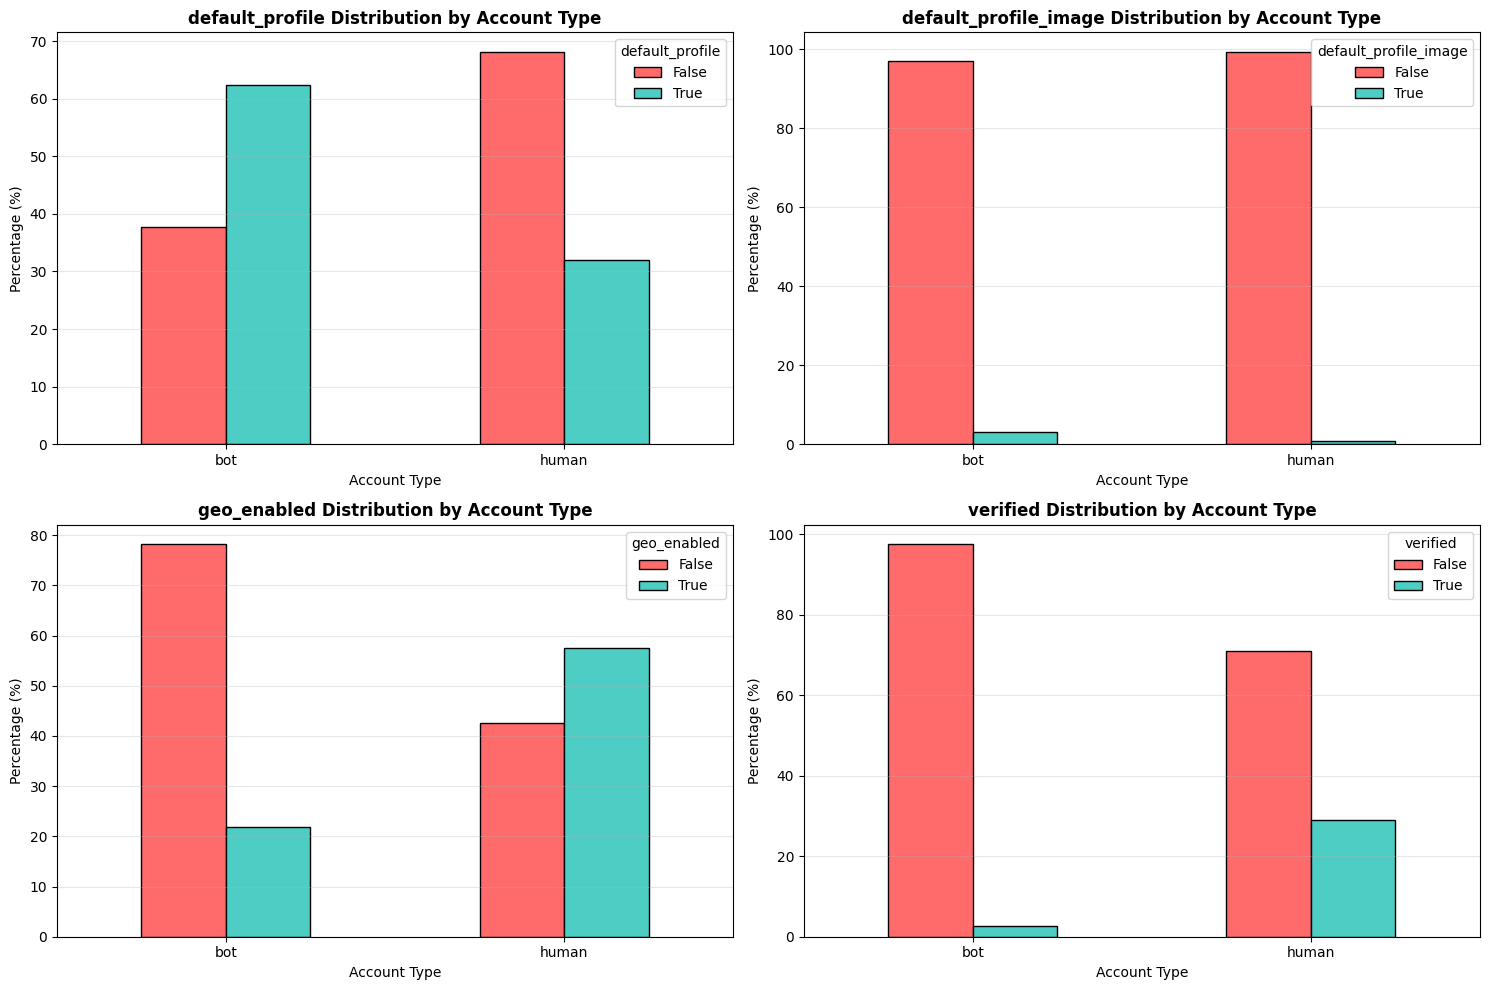

In [8]:
# Boolean features analysis
boolean_features = ['default_profile', 'default_profile_image', 'geo_enabled', 'verified']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(boolean_features):
    # Create cross-tabulation
    ct = pd.crosstab(df['account_type'], df[feature], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
    axes[idx].set_title(f'{feature} Distribution by Account Type', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Account Type')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title=feature, labels=['False', 'True'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Outlier Detection by Account Type (IQR Method)

BOT Accounts:
               Feature  Outliers  Outlier_%
       followers_count      2184      17.58
        statuses_count      2057      16.56
average_tweets_per_day      2012      16.19
         friends_count      1834      14.76
      favourites_count      1025       8.25
            Unnamed: 0         0       0.00
      account_age_days         0       0.00

HUMAN Accounts:
               Feature  Outliers  Outlier_%
       followers_count      5181      20.71
      favourites_count      2957      11.82
         friends_count      2786      11.14
average_tweets_per_day      2594      10.37
        statuses_count      2549      10.19
            Unnamed: 0         0       0.00
      account_age_days         0       0.00


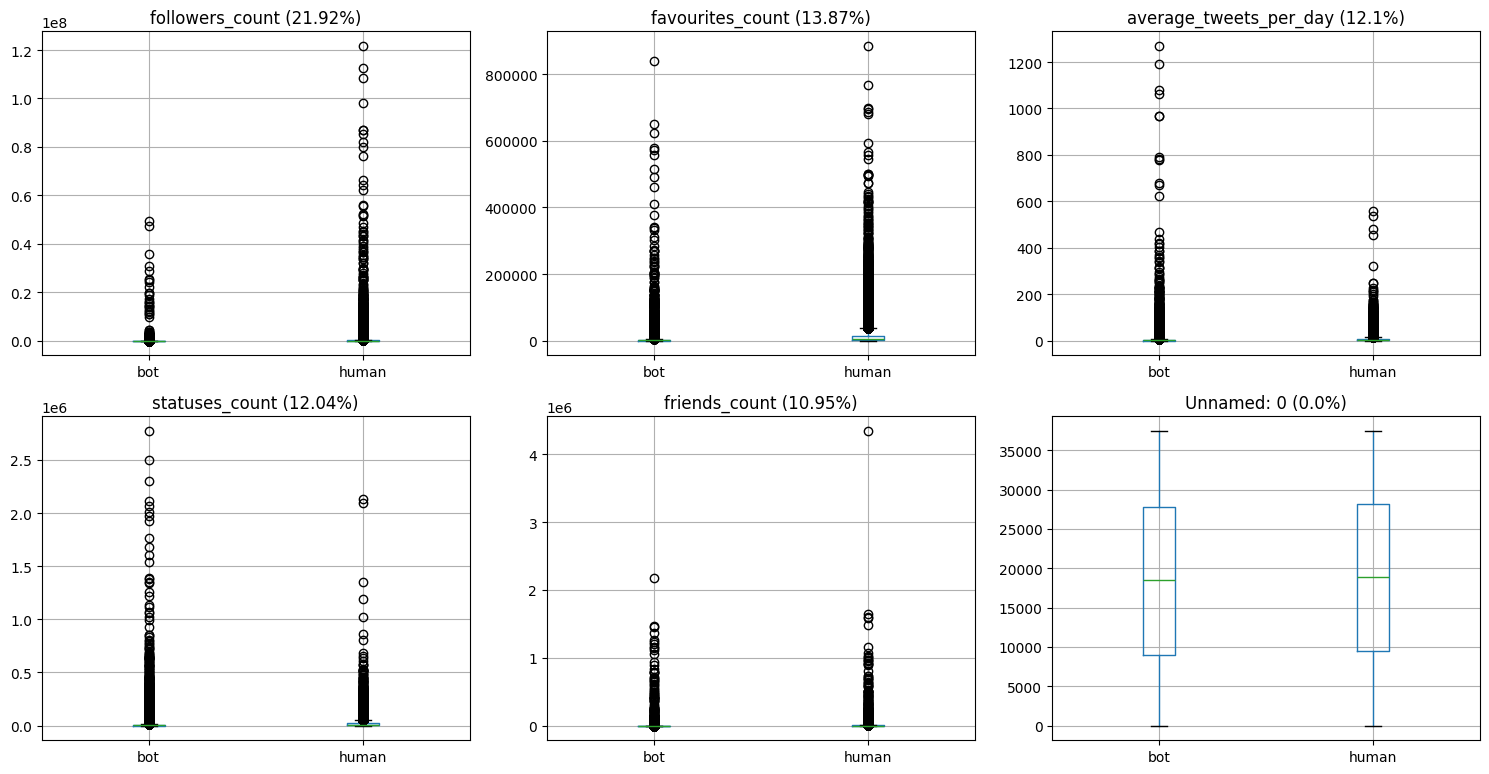

In [ ]:
# Define numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')

# IQR method by account type
print("Outlier Detection by Account Type (IQR Method)")
print("="*80)

for account in ['bot', 'human']:
    df_account = df[df['account_type'] == account]
    outlier_summary = []
    
    for feature in numerical_features:
        Q1, Q3 = df_account[feature].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outlier_count = ((df_account[feature] < lower) | (df_account[feature] > upper)).sum()
        
        outlier_summary.append({
            'Feature': feature,
            'Outliers': outlier_count,
            'Outlier_%': round(outlier_count / len(df_account) * 100, 2)
        })
    
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_%', ascending=False)
    print(f"\n{account.upper()} Accounts:")
    print(outlier_df.to_string(index=False))

# Visualize top 6 features with most outliers (combined)
outlier_summary_all = []
for feature in numerical_features:
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_count = ((df[feature] < lower) | (df[feature] > upper)).sum()
    outlier_summary_all.append({'Feature': feature, 'Outlier_%': round(outlier_count / len(df) * 100, 2)})

outlier_df_all = pd.DataFrame(outlier_summary_all).sort_values('Outlier_%', ascending=False)
top_features = outlier_df_all.nlargest(6, 'Outlier_%')['Feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    df.boxplot(column=feature, by='account_type', ax=axes[idx])
    axes[idx].set_title(f'{feature} ({outlier_df_all[outlier_df_all["Feature"]==feature]["Outlier_%"].values[0]}%)')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()

## 2. Correlation Analysis

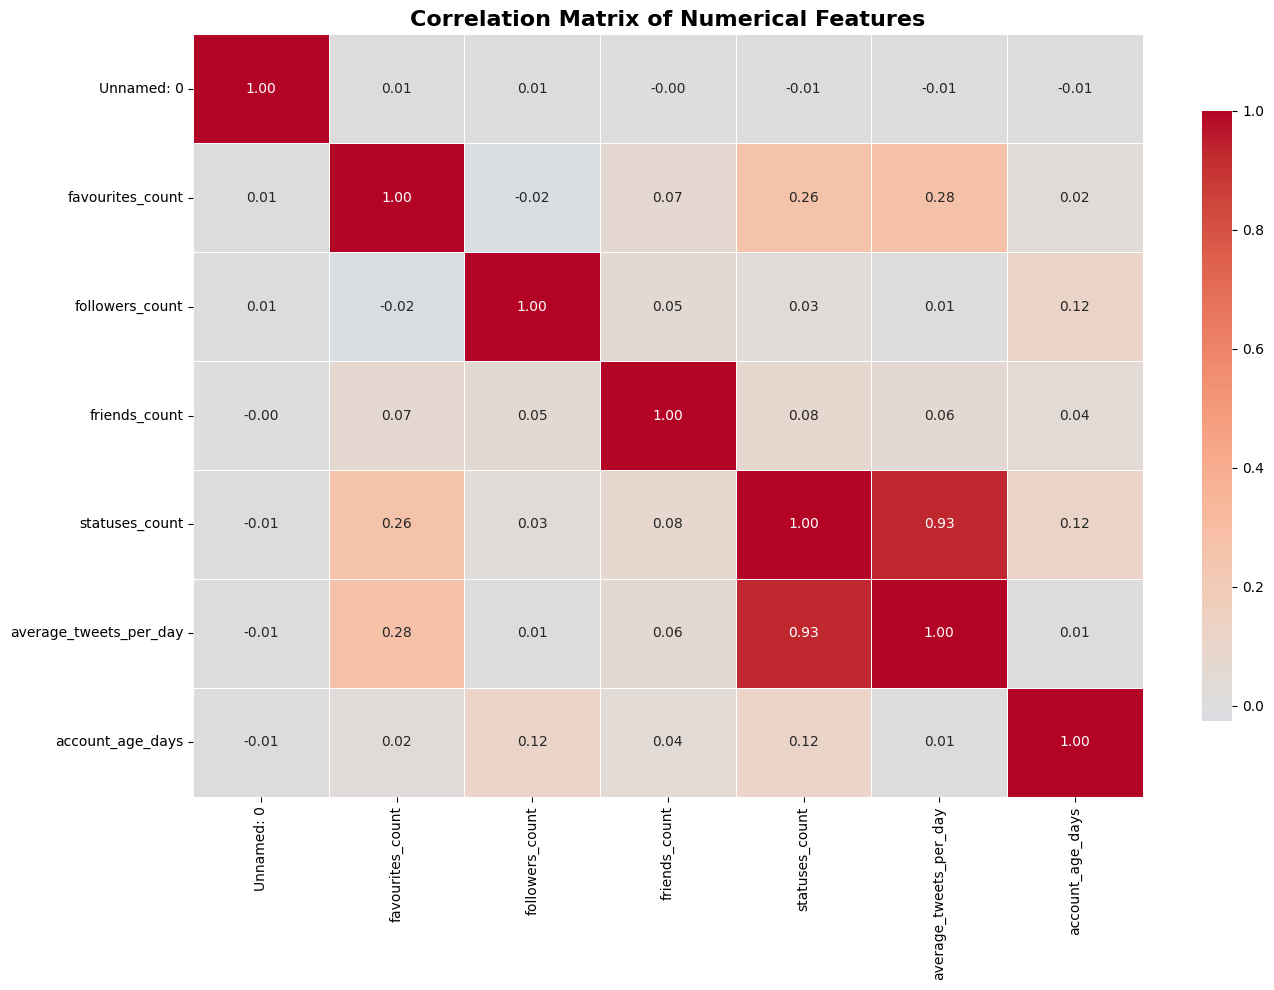


Highly Correlated Features (|r| > 0.7):
statuses_count <-> average_tweets_per_day: 0.929


In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

print("\nHighly Correlated Features (|r| > 0.7):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

## 3. Feature Importance


Top 10 Most Important Features:
               Feature  Importance
       followers_count    0.236081
      favourites_count    0.199312
         friends_count    0.154437
        statuses_count    0.120799
      account_age_days    0.119118
average_tweets_per_day    0.110296
            Unnamed: 0    0.059957


C:\Users\admin\AppData\Local\Temp\ipykernel_26152\1229038041.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')


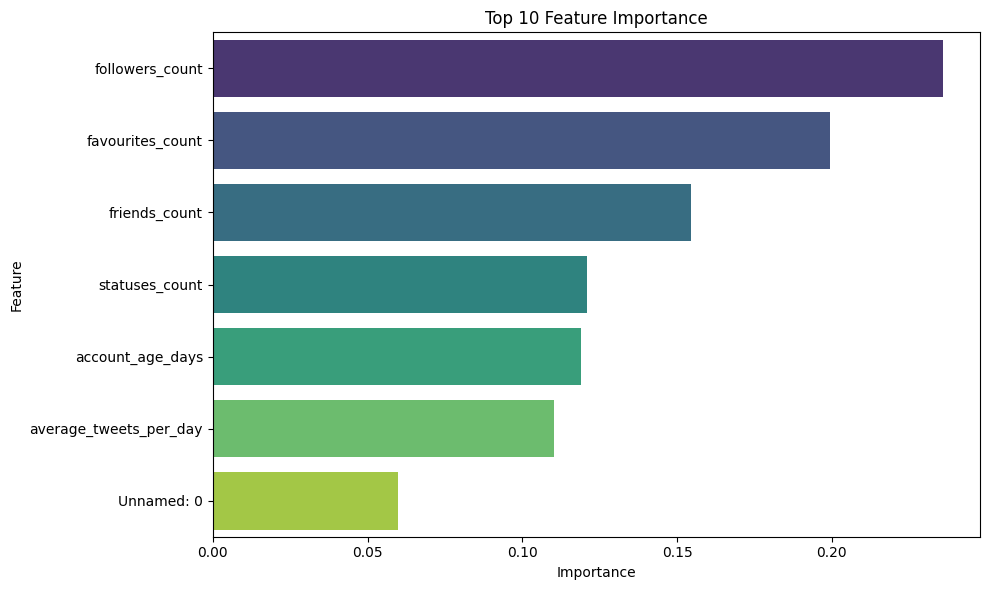

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['account_type'])
X = df[numerical_features].fillna(0)

# Quick RF
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Feature importance
feat_imp = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feat_imp.head(10).to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

## Conclusion

### Boolean features

`default_profile` and `geo_enabled` seem to have some indication of bot accounts

### Feature importance

Top Predictors: `followers_count`, `favourites_count`, `friends_count`, `statuses_count`, `account_age_days`



## To do

1. Remove highly correlated features
2. One-hot encoding for presence of text features


### Food for thought (not sure if need to change)

1. Class imbalance (shouldnt be an issue)
2. Missing values (explore different ways of filling/removing besides mode)
3. Scaling of numerical values (to handle outliers)